# Sports Analytics - Reading Excel Files

In [40]:
# Import libraries needed to read and work with data
import pandas as pd
import os

In [41]:
# Load the player data from an Excel file and show a preview
player_data = pd.read_excel('kate_player_data.xlsx')
print("Player Data:")
print(player_data.head())  # Show first few rows
print(f"\nShape: {player_data.shape}")  # Show how many rows and columns
print(f"Columns: {player_data.columns.tolist()}")  # Show column names

Player Data:
          Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                NaN            NaN        NaN        NaN        NaN   
1                NaN  Column Labels        NaN        NaN        NaN   
2                NaN      Argentina     Brazil     Canada      Chile   
3  Average of rating           1.75   2.083333   2.041667   1.583333   

  Unnamed: 5 Unnamed: 6 Unnamed: 7     Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0        NaN        NaN        NaN            NaN        NaN         NaN   
1        NaN        NaN        NaN            NaN        NaN         NaN   
2   Columbia    Denmark     France  Great.Britain      Japan      Poland   
3       1.75   2.041667   1.916667       2.083333      2.125    2.041667   

  Unnamed: 11 Unnamed: 12 Unnamed: 13  Unnamed: 14  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2      Sweden         USA     (blank)  Grand Total  
3    2.291667    2.041667        

In [42]:
# Load the game stint data from an Excel file and show a preview
stint_data = pd.read_excel('kate_stint_data.xlsx')
print("Stint Data:")
print(stint_data.head())  # Show first few rows
print(f"\nShape: {stint_data.shape}")  # Show how many rows and columns
print(f"Columns: {stint_data.columns.tolist()}")  # Show column names

Stint Data:
   game_id h_team a_team   minutes  h_goals  a_goals   home1   home2   home3  \
0        1    USA  Japan  4.252969        4        9  USA_p4  USA_p1  USA_p3   
1        1    USA  Japan  5.688809        6       11  USA_p1  USA_p7  USA_p6   
2        1    USA  Japan  1.149557        0        1  USA_p8  USA_p1  USA_p4   
3        1    USA  Japan  3.511617        7        5  USA_p2  USA_p7  USA_p8   
4        1    USA  Japan  2.163139        7        5  USA_p9  USA_p5  USA_p8   

    home4      away1      away2      away3      away4  
0  USA_p6  Japan_p12   Japan_p4   Japan_p8   Japan_p6  
1  USA_p5   Japan_p7  Japan_p10   Japan_p8  Japan_p12  
2  USA_p5   Japan_p5   Japan_p3   Japan_p7  Japan_p10  
3  USA_p6   Japan_p2   Japan_p4  Japan_p10  Japan_p12  
4  USA_p7   Japan_p8   Japan_p6  Japan_p10   Japan_p1  

Shape: (7448, 14)
Columns: ['game_id', 'h_team', 'a_team', 'minutes', 'h_goals', 'a_goals', 'home1', 'home2', 'home3', 'home4', 'away1', 'away2', 'away3', 'away4']


In [43]:
# Create a list of every player's performance in each game
import numpy as np

# Create empty lists for players (not needed for main analysis but good for reference)
home_players = []
away_players = []

# Build a list to store each player's appearance and performance
player_metrics = []

# Loop through each game in the stint data
for idx, row in stint_data.iterrows():
    # Extract game information from this row
    game_id = row['game_id']
    h_team = row['h_team']
    a_team = row['a_team']
    minutes = row['minutes']
    h_goals = row['h_goals']
    a_goals = row['a_goals']
    
    # Add each home player to the metrics list with their game details
    for player_col in ['home1', 'home2', 'home3', 'home4']:
        player = row[player_col]
        player_metrics.append({
            'player': player,
            'team': h_team,
            'opponent': a_team,
            'game_id': game_id,
            'minutes': minutes,
            'goals_for': h_goals,
            'goals_against': a_goals,
            'position': player_col
        })
    
    # Add each away player to the metrics list with their game details
    for player_col in ['away1', 'away2', 'away3', 'away4']:
        player = row[player_col]
        player_metrics.append({
            'player': player,
            'team': a_team,
            'opponent': h_team,
            'game_id': game_id,
            'minutes': minutes,
            'goals_for': a_goals,
            'goals_against': h_goals,
            'position': player_col
        })

# Convert the list of player data into a dataframe (table format)
player_appearances = pd.DataFrame(player_metrics)

# Show preview of the data
print("Player Appearances DataFrame:")
print(player_appearances.head(10))
print(f"\nShape: {player_appearances.shape}")

Player Appearances DataFrame:
      player   team opponent  game_id   minutes  goals_for  goals_against  \
0     USA_p4    USA    Japan        1  4.252969          4              9   
1     USA_p1    USA    Japan        1  4.252969          4              9   
2     USA_p3    USA    Japan        1  4.252969          4              9   
3     USA_p6    USA    Japan        1  4.252969          4              9   
4  Japan_p12  Japan      USA        1  4.252969          9              4   
5   Japan_p4  Japan      USA        1  4.252969          9              4   
6   Japan_p8  Japan      USA        1  4.252969          9              4   
7   Japan_p6  Japan      USA        1  4.252969          9              4   
8     USA_p1    USA    Japan        1  5.688809          6             11   
9     USA_p7    USA    Japan        1  5.688809          6             11   

  position  
0    home1  
1    home2  
2    home3  
3    home4  
4    away1  
5    away2  
6    away3  
7    away4  
8    

In [44]:
# Combine all player game appearances to calculate overall player statistics
# Group by player and team, then calculate totals and averages
player_stats = player_appearances.groupby(['player', 'team']).agg({
    'minutes': ['sum', 'count', 'mean'],  # Total, count, and average minutes
    'goals_for': ['sum', 'mean'],  # Total and average goals scored
    'goals_against': ['sum', 'mean']  # Total and average goals against
}).reset_index()

# Clean up the column names to make them easier to read
player_stats.columns = ['_'.join(col).strip('_') for col in player_stats.columns.values]
player_stats.columns = ['player', 'team', 'total_minutes', 'appearances', 'avg_minutes', 
                        'total_goals_for', 'avg_goals_for', 'total_goals_against', 'avg_goals_against']

# Calculate new helpful statistics from the existing data
player_stats['goal_differential'] = player_stats['total_goals_for'] - player_stats['total_goals_against']  # Goals for minus against
player_stats['goal_differential_per_appearance'] = player_stats['goal_differential'] / player_stats['appearances']  # Average goal differential per game
player_stats['goals_for_per_minute'] = player_stats['total_goals_for'] / player_stats['total_minutes']  # Goals per minute played

# Sort the results by team first, then by best goal differential per game
player_stats = player_stats.sort_values(['team', 'goal_differential_per_appearance'], ascending=[True, False])

# Display the final results
print("Player Statistics by Team:")
print(player_stats.head(20))
print(f"\nTotal unique players: {len(player_stats)}")
print(f"\nTeams: {player_stats['team'].unique()}")

Player Statistics by Team:
           player       team  total_minutes  appearances  avg_minutes  \
10   Argentina_p8  Argentina    1076.439266          383     2.810546   
9    Argentina_p7  Argentina    1204.896976          425     2.835052   
1   Argentina_p10  Argentina    1516.094215          525     2.887799   
5    Argentina_p3  Argentina    1276.968507          448     2.850376   
3   Argentina_p12  Argentina    1299.218187          474     2.740967   
0    Argentina_p1  Argentina    1078.346476          368     2.930289   
2   Argentina_p11  Argentina    1217.115180          418     2.911759   
8    Argentina_p6  Argentina    1346.785604          467     2.883909   
6    Argentina_p4  Argentina    1094.065616          377     2.902031   
11   Argentina_p9  Argentina    1340.283266          458     2.926383   
4    Argentina_p2  Argentina    1033.778072          347     2.979188   
7    Argentina_p5  Argentina     596.008634          206     2.893246   
12      Brazil_p1     Br

In [45]:
# Save the final results to a CSV file so we can use it in other programs
player_stats.to_csv('player_statistics.csv', index=False)
print("Player statistics exported to 'player_statistics.csv'")

Player statistics exported to 'player_statistics.csv'


In [46]:
# Create a player score based on differential performance metrics and sort by country
# Create a copy of player stats for the scoring dataframe
player_scores = player_stats[['player', 'team', 'goal_differential_per_appearance', 'goals_for_per_minute', 'appearances']].copy()

# Create a composite score: average the normalized differential metrics
# Normalize goal_differential_per_appearance to a 0-100 scale for better readability
player_scores['score'] = player_scores['goal_differential_per_appearance'] * 100

# Sort by country (team) first, then by score from highest to lowest
player_scores = player_scores.sort_values(['team', 'score'], ascending=[True, False])

# Display the results
print("Player Scores by Country (Team):")
print(player_scores.to_string())
print(f"\nDataframe shape: {player_scores.shape}")


Player Scores by Country (Team):
                player           team  goal_differential_per_appearance  goals_for_per_minute  appearances       score
10        Argentina_p8      Argentina                         -1.046997              1.273644          383 -104.699739
9         Argentina_p7      Argentina                         -1.211765              1.210062          425 -121.176471
1        Argentina_p10      Argentina                         -1.428571              1.150984          525 -142.857143
5         Argentina_p3      Argentina                         -1.573661              1.143333          448 -157.366071
3        Argentina_p12      Argentina                         -1.578059              1.108359          474 -157.805907
0         Argentina_p1      Argentina                         -1.654891              1.147127          368 -165.489130
2        Argentina_p11      Argentina                         -1.691388              1.084532          418 -169.138756
8         Argen

In [47]:
# Sort all players by score from highest to lowest, ignoring country
# Create a copy and sort by score descending
player_scores_global = player_scores.sort_values('score', ascending=False)

# Display the results
print("All Players Sorted by Score (Highest to Lowest):")
print(player_scores_global.to_string())
print(f"\nTop 10 players:")
print(player_scores_global.head(10).to_string())


All Players Sorted by Score (Highest to Lowest):
                player           team  goal_differential_per_appearance  goals_for_per_minute  appearances       score
99           Japan_p12          Japan                          2.311054              1.958180          389  231.105398
105           Japan_p7          Japan                          2.023605              1.851666          466  202.360515
96            Japan_p1          Japan                          1.817360              1.828085          553  181.735986
142             USA_p8            USA                          1.728180              1.857360          401  172.817955
141             USA_p7            USA                          1.678647              1.830789          473  167.864693
106           Japan_p8          Japan                          1.567850              1.782663          479  156.784969
98           Japan_p11          Japan                          1.553571              1.743776          224  155.357143

In [48]:
# Feature Engineering: Prepare data for machine learning
# Calculate opponent strength for each team
opponent_stats = player_stats.groupby('team').agg({
    'goal_differential_per_appearance': 'mean',
    'goals_for_per_minute': 'mean'
}).reset_index()
opponent_stats.columns = ['opponent', 'opponent_avg_differential', 'opponent_goals_per_min']

# Merge opponent strength into player appearances data
player_appearances_ml = player_appearances.merge(
    opponent_stats,
    left_on='opponent',
    right_on='opponent',
    how='left'
)

# Create features aggregated by player and team
player_features = player_appearances_ml.groupby(['player', 'team']).agg({
    'minutes': 'sum',
    'goals_for': 'sum',
    'goals_against': 'sum',
    'opponent_avg_differential': 'mean',  # Average strength of opponents faced
    'opponent_goals_per_min': 'mean'  # Average opponent offensive ability
}).reset_index()

player_features.columns = ['player', 'team', 'total_minutes', 'goals_for', 'goals_against', 
                           'avg_opponent_differential', 'avg_opponent_goals_per_min']

# Create target variable (goal differential)
player_features['goal_differential'] = player_features['goals_for'] - player_features['goals_against']

# Display feature summary
print("Feature Engineering Complete:")
print(f"Total players for ML: {len(player_features)}")
print(f"\nFeature statistics:")
print(player_features[['total_minutes', 'goals_for', 'goals_against', 'avg_opponent_differential', 'avg_opponent_goals_per_min', 'goal_differential']].describe())
print(f"\nSample of features:")
print(player_features.head())


Feature Engineering Complete:
Total players for ML: 144

Feature statistics:
       total_minutes    goals_for  goals_against  avg_opponent_differential  \
count     144.000000   144.000000     144.000000                 144.000000   
mean     1176.500000  1825.972222    1825.972222                  -0.002897   
std       271.527591   464.092346     515.845371                   0.081531   
min       530.302992   579.000000     809.000000                  -0.200225   
25%      1029.042703  1511.000000    1529.750000                  -0.056013   
50%      1213.355404  1862.000000    1773.500000                  -0.010349   
75%      1338.145915  2113.250000    2054.000000                   0.049513   
max      2540.122369  3388.000000    4904.000000                   0.204385   

       avg_opponent_goals_per_min  goal_differential  
count                  144.000000         144.000000  
mean                     1.552146           0.000000  
std                      0.016600         415.

In [49]:
# Machine Learning Model: Train and predict player scores
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare features and target
X = player_features[['total_minutes', 'avg_opponent_differential', 'avg_opponent_goals_per_min']]
y = player_features['goal_differential']

# Handle missing values
X = X.fillna(X.mean())

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Machine Learning Model Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Predict scores for all players
X_all_scaled = scaler.transform(X.fillna(X.mean()))
player_features['predicted_score'] = model.predict(X_all_scaled) * 100

# Sort and display top players by predicted score
player_features_sorted = player_features.sort_values('predicted_score', ascending=False)
print("\nTop 20 Players by ML Predicted Score:")
print(player_features_sorted[['player', 'team', 'predicted_score', 'goal_differential']].head(20).to_string())

# Display all players
print(f"\n\nAll Players Sorted by Predicted Score:")
print(player_features_sorted[['player', 'team', 'predicted_score', 'goal_differential']].to_string())


Machine Learning Model Results:
R² Score: 0.5610
RMSE: 269.6673

Top 20 Players by ML Predicted Score:
               player           team  predicted_score  goal_differential
96           Japan_p1          Japan     82946.000000               1005
105          Japan_p7          Japan     78116.000000                943
97          Japan_p10          Japan     75820.000000                739
141            USA_p7            USA     68093.000000                794
106          Japan_p8          Japan     67289.250000                751
140            USA_p6            USA     64934.000000                658
142            USA_p8            USA     55877.851087                693
99          Japan_p12          Japan     55029.200000                899
102          Japan_p4          Japan     50730.000000                519
104          Japan_p6          Japan     49360.000000                454
100          Japan_p2          Japan     47140.000000                308
143            USA_p9

Feature Importance Analysis:
avg_opponent_differential: 71.96%
avg_opponent_goals_per_min: 15.35%
total_minutes: 12.69%

Interpretation:
- Total Minutes: How much time a player has been on the field
- Avg Opponent Differential: The strength of teams the player faced
- Avg Opponent Goals Per Min: The offensive threat level of opponents


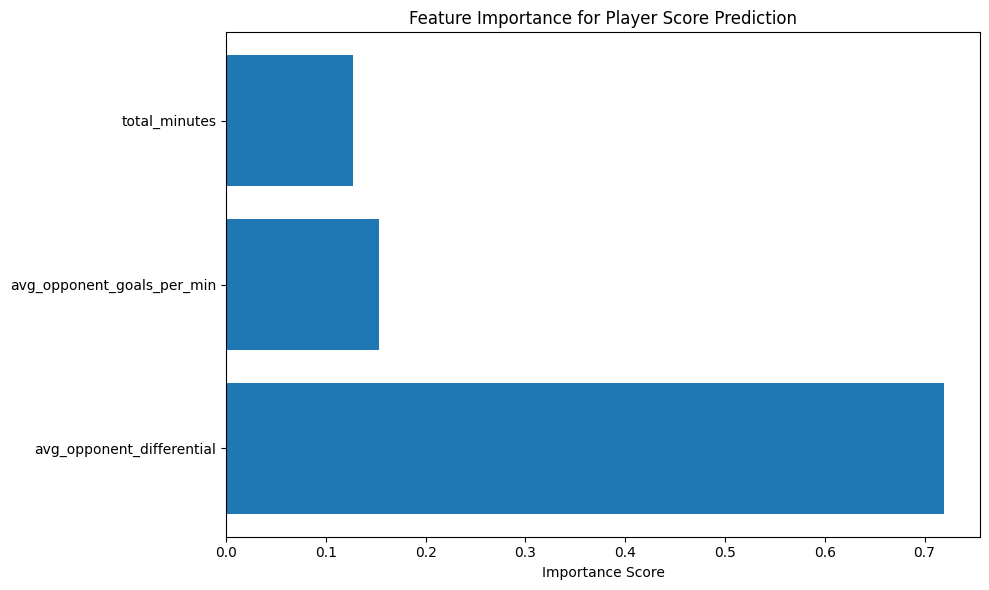


Model Performance Summary:
- Training set size: 115 players
- Test set size: 29 players
- Model explains 56.10% of the variance in player performance
- Average prediction error: 269.67 goals


In [50]:
# Feature Importance Analysis: Understand which factors matter most
import matplotlib.pyplot as plt

# Extract feature importance from the trained model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Analysis:")
print("=" * 50)
for idx, row in feature_importance.iterrows():
    percentage = row['importance'] * 100
    print(f"{row['feature']}: {percentage:.2f}%")

print(f"\nInterpretation:")
print(f"- Total Minutes: How much time a player has been on the field")
print(f"- Avg Opponent Differential: The strength of teams the player faced")
print(f"- Avg Opponent Goals Per Min: The offensive threat level of opponents")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance for Player Score Prediction')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nModel Performance Summary:")
print(f"- Training set size: {len(X_train)} players")
print(f"- Test set size: {len(X_test)} players")
print(f"- Model explains {r2*100:.2f}% of the variance in player performance")
print(f"- Average prediction error: {rmse:.2f} goals")


In [51]:
# Improved Machine Learning Model with Better Features and Tuning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Create more meaningful features normalized by playing time
player_features_improved = player_features.copy()

# Add per-minute metrics that account for playing time differences
player_features_improved['goals_per_minute'] = player_features_improved['goals_for'] / (player_features_improved['total_minutes'] + 1)
player_features_improved['goals_against_per_minute'] = player_features_improved['goals_against'] / (player_features_improved['total_minutes'] + 1)
player_features_improved['goal_diff_per_minute'] = player_features_improved['goal_differential'] / (player_features_improved['total_minutes'] + 1)

# Prepare improved features with normalized metrics
X_improved = player_features_improved[['total_minutes', 'goals_per_minute', 'goals_against_per_minute', 
                                       'avg_opponent_differential', 'avg_opponent_goals_per_min']]
y_improved = player_features_improved['goal_differential']

# Handle missing values
X_improved = X_improved.fillna(X_improved.mean())

# Split data with same random state for consistency
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y_improved, test_size=0.2, random_state=42)

# Scale features
scaler_improved = StandardScaler()
X_train_imp_scaled = scaler_improved.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_improved.transform(X_test_imp)

print("Comparing Multiple Improved Models:")
print("=" * 70)

# Test improved Random Forest with tuned parameters
rf_improved = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=3, random_state=42)
rf_improved.fit(X_train_imp_scaled, y_train_imp)
rf_pred_imp = rf_improved.predict(X_test_imp_scaled)
rf_r2_imp = r2_score(y_test_imp, rf_pred_imp)
rf_rmse_imp = np.sqrt(mean_squared_error(y_test_imp, rf_pred_imp))
rf_mae_imp = mean_absolute_error(y_test_imp, rf_pred_imp)

print(f"\nRandom Forest (Improved):")
print(f"  R² Score: {rf_r2_imp:.4f} (improvement: {rf_r2_imp - r2:+.4f})")
print(f"  RMSE: {rf_rmse_imp:.4f} (improvement: {rmse - rf_rmse_imp:+.4f})")
print(f"  MAE: {rf_mae_imp:.4f}")

# Test Gradient Boosting model
gb_improved = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_improved.fit(X_train_imp_scaled, y_train_imp)
gb_pred_imp = gb_improved.predict(X_test_imp_scaled)
gb_r2_imp = r2_score(y_test_imp, gb_pred_imp)
gb_rmse_imp = np.sqrt(mean_squared_error(y_test_imp, gb_pred_imp))
gb_mae_imp = mean_absolute_error(y_test_imp, gb_pred_imp)

print(f"\nGradient Boosting (Improved):")
print(f"  R² Score: {gb_r2_imp:.4f} (improvement: {gb_r2_imp - r2:+.4f})")
print(f"  RMSE: {gb_rmse_imp:.4f} (improvement: {rmse - gb_rmse_imp:+.4f})")
print(f"  MAE: {gb_mae_imp:.4f}")

# Choose best improved model
best_model_improved = gb_improved if gb_r2_imp > rf_r2_imp else rf_improved
best_name_improved = "Gradient Boosting" if gb_r2_imp > rf_r2_imp else "Random Forest"

print(f"\n{'='*70}")
print(f"Best Improved Model: {best_name_improved}")
print(f"{'='*70}")

# Generate final predictions with best improved model
X_all_imp_scaled = scaler_improved.transform(X_improved.fillna(X_improved.mean()))
player_features_improved['predicted_score_v2'] = best_model_improved.predict(X_all_imp_scaled) * 100

# Sort and display results
player_features_improved_sorted = player_features_improved.sort_values('predicted_score_v2', ascending=False)

print(f"\nTop 20 Players by Improved ML Model:")
print(player_features_improved_sorted[['player', 'team', 'predicted_score_v2', 'goal_differential']].head(20).to_string())

print(f"\n\nAll Players Sorted by Improved ML Predicted Score:")
print(player_features_improved_sorted[['player', 'team', 'predicted_score_v2', 'goal_differential']].to_string())


Comparing Multiple Improved Models:

Random Forest (Improved):
  R² Score: 0.9253 (improvement: +0.3643)
  RMSE: 111.2467 (improvement: +158.4206)
  MAE: 65.5587

Gradient Boosting (Improved):
  R² Score: 0.9301 (improvement: +0.3691)
  RMSE: 107.6141 (improvement: +162.0532)
  MAE: 59.6790

Best Improved Model: Gradient Boosting

Top 20 Players by Improved ML Model:
                player           team  predicted_score_v2  goal_differential
96            Japan_p1          Japan       100500.147797               1005
105           Japan_p7          Japan        94298.196097                943
99           Japan_p12          Japan        89900.420695                899
141             USA_p7            USA        79399.391385                794
97           Japan_p10          Japan        77090.709162                739
106           Japan_p8          Japan        75100.979355                751
142             USA_p8            USA        69301.370731                693
140           